# Object Detection Using Faster R-CNN

### Leveraging Faster RCNN for Object Detection

Aim: This experiment aims to apply Faster R-CNN, a state-of-the-art object detection framework for the detection of solar panel damage within thermal images.

The dataset consists of thermal images depicting solar panels. These images are labelled for object detection into five classes, namely 'Cell', 'Cell-Multi', 'No-Anomaly', 'Shadowing', and 'Unclassified'. The dataset is partitioned into training, validation and testing sets, comprising 1167, 250 and 250 images respectively.


Below are the steps performed:
1. Cloning the Repository
2. Installing required libraries
3. Unzipping the dataset
4. Creating a Custom dataset YAML file
5. Model training
6. Visualizing Results
7. Model Evaluation
8. Model Inference

## 1. Cloning the Repository

In [2]:
%cd /root/AT2/Object_detection/FasterRCNN

/root/AT2/Object_detection/FasterRCNN


In [21]:
!git clone https://github.com/nabinsharmaUTS/ObjectDetection-FasterRCNN.git

Cloning into 'ObjectDetection-FasterRCNN'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 127 (delta 60), reused 123 (delta 58), pack-reused 0
Receiving objects: 100% (127/127), 4.26 MiB | 32.58 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [3]:
# Enter the repo directory.
%cd /root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN

/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN


## 2. Installing required libraries

In [5]:
# Installing the Requirements
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip install --upgrade pip


## 3. Unzipping the Dataset


In [6]:
!pwd 

/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN


In [27]:
%cd /root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/data

/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/data


In [29]:
!unzip /root/AT2/Object_detection/FasterRCNN/data.zip

Archive:  /root/AT2/Object_detection/FasterRCNN/data.zip
  inflating: test/100005.jpg         
  inflating: test/100005.xml         
  inflating: test/100009.jpg         
  inflating: test/100009.xml         
  inflating: test/100035.jpg         
  inflating: test/100035.xml         
  inflating: test/100048.jpg         
  inflating: test/100048.xml         
  inflating: test/100055.jpg         
  inflating: test/100055.xml         
  inflating: test/100057.jpg         
  inflating: test/100057.xml         
  inflating: test/100070.jpg         
  inflating: test/100070.xml         
  inflating: test/100077.jpg         
  inflating: test/100077.xml         
  inflating: test/100087.jpg         
  inflating: test/100087.xml         
  inflating: test/100089.jpg         
  inflating: test/100089.xml         
  inflating: test/100094.jpg         
  inflating: test/100094.xml         
  inflating: test/100096.jpg         
  inflating: test/100096.xml         
  inflating: test/100097.jpg   

In [7]:
# import necessary libraries
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

Displaying Sample Images from training set

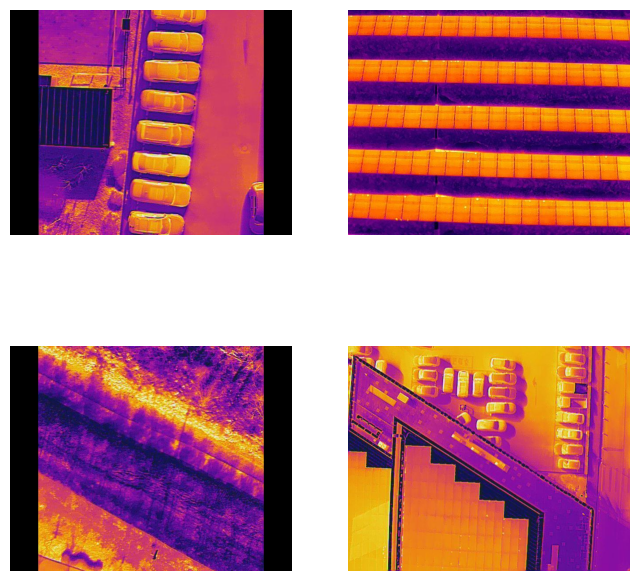

In [70]:
# Directory containing the images
image_dir = '/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/data/train'

# Get a list of all image filenames in the directory
image_files = [file for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Check if the number of images is less than 4
if len(image_files) < 4:
    print("There are fewer than 4 images in the directory.")
else:
    # Choose four random image filenames
    random_images = np.random.choice(image_files, size=min(4, len(image_files)), replace=False)

    # Plot the random images
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    for i, image_name in enumerate(random_images):
        image_path = os.path.join(image_dir, image_name)
        image = plt.imread(image_path)
        axs[i // 2, i % 2].imshow(image)
        axs[i // 2, i % 2].axis('off')

    plt.show()

## 4. Creating Custom Dataset YAML File 

In [6]:
%cd /root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/

/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN


Names of classes are defined for object detection including background.

In [31]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/data/train'
TRAIN_DIR_LABELS: '/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/data/train'
VALID_DIR_IMAGES: '/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/data/valid'
VALID_DIR_LABELS: '/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/data/valid'

# Class names.
CLASSES: [
    '__background__',
    'Cell',
    'Cell-Multi',
    'No-Anomaly',
    'Shadowing',
    'Unclassified'
 ]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## 5. Model Training 

In [65]:
!wandb disabled

W&B disabled.


In [ ]:
!python train.py --config data_configs/custom_data.yaml --epochs 100 --model fasterrcnn_resnet50_fpn_v2 --project-name AT2_FasterRCNN --batch-size 3 --no-mosaic --seed 14360820

Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1167
Number of validation samples: 250

Building model from scratch...
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         [100, 4]                  --
├─GeneralizedRCNNTransform: 1-1                    [3, 3, 800, 800]          --
├─BackboneWithFPN: 1-2                             [3, 256, 13, 13]          --
│    └─IntermediateLayerGetter: 2-1                [3, 2048, 25, 25]         --
│    │    └─Conv2d: 3-1                            [3, 64, 400, 400]         (9,408)
│    │    └─BatchNorm2d: 3-2                       [3, 64, 400, 400]         (128)
│    │    └─ReLU: 3-3                              [3, 64, 400, 400]         --
│    │    └─MaxPool2d: 3-4                         [3, 64, 200, 200]         --
│    │    └─Sequential: 3-5                        [3, 256, 200, 200]        (215,808)
│    │    └─Sequenti

Resuming the model training

In [11]:
!python train.py --config data_configs/custom_data.yaml --epochs 100 --model fasterrcnn_resnet50_fpn_v2 --project-name AT2_FasterRCNN --batch-size 3 --no-mosaic --seed 14360820 --weights outputs/training/AT2_FasterRCNN/last_model.pth --resume-training

Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1167
Number of validation samples: 250

Loading pretrained weights...
RESUMING TRAINING...
Resuming from epoch 47...
Loading previous batch wise loss list...
Loading previous epoch wise loss list...
Loading previous mAP list
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         [100, 4]                  --
├─GeneralizedRCNNTransform: 1-1                    [3, 3, 800, 800]          --
├─BackboneWithFPN: 1-2                             [3, 256, 13, 13]          --
│    └─IntermediateLayerGetter: 2-1                [3, 2048, 25, 25]         --
│    │    └─Conv2d: 3-1                            [3, 64, 400, 400]         (9,408)
│    │    └─BatchNorm2d: 3-2                       [3, 64, 400, 400]         (128)
│    │    └─ReLU: 3-3                              [3, 64, 400, 400]         --
│    │    └─MaxPool2d: 3-4       

In [6]:
!python train.py --config data_configs/custom_data.yaml --epochs 100 --model fasterrcnn_resnet50_fpn_v2 --project-name AT2_FasterRCNN --batch-size 3 --no-mosaic --seed 14360820 --weights outputs/training/AT2_FasterRCNN/last_model.pth --resume-training

Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1167
Number of validation samples: 250

Loading pretrained weights...
RESUMING TRAINING...
Resuming from epoch 68...
Loading previous batch wise loss list...
Loading previous epoch wise loss list...
Loading previous mAP list
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         [100, 4]                  --
├─GeneralizedRCNNTransform: 1-1                    [3, 3, 800, 800]          --
├─BackboneWithFPN: 1-2                             [3, 256, 13, 13]          --
│    └─IntermediateLayerGetter: 2-1                [3, 2048, 25, 25]         --
│    │    └─Conv2d: 3-1                            [3, 64, 400, 400]         (9,408)
│    │    └─BatchNorm2d: 3-2                       [3, 64, 400, 400]         (128)
│    │    └─ReLU: 3-3                              [3, 64, 400, 400]         --
│    │    └─MaxPool2d: 3-4       

In [ ]:
#!python train.py --config data_configs/custom_data.yaml --epochs 25 --model fasterrcnn_resnet50_fpn_v2 --project-name AT2_FasterRCNN --batch-size 3 --no-mosaic --early-stopping-patience 12 --seed 14360820 --resume-training

In [ ]:
#!python train.py --config data_configs/custom_data.yaml --epochs 25 --model fasterrcnn_resnet50_fpn_v2 --project-name AT2_FasterRCNN --batch-size 3 --no-mosaic --early-stopping-patience 12 --seed 14360820 --resume-training

## 6. Model Evaluation

In [93]:
# Verbose mAP.
!python eval.py --weights outputs/training/AT2_FasterRCNN/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/opt/conda/lib/python3.8/site-packages/albumentations/core/composition.py:151: UserWarning: Got processor for bboxes, but no transform to process it.
  warnings.warn(f"Got processor for {proc.default_data_name}, but no transform to process it.")
100%|███████████████████████████████████████████| 32/32 [00:34<00:00,  1.25it/s]INFO:utils.logging:Test:  [31/32]  eta: 0:00:01    time: 0.9902  data: 0.0031  max mem: 4386
INFO:utils.logging:Test: Total time: 0:00:34 (1.0750 s / it)
100%|███████████████████████████████████████████| 32/32 [00:34<00:00,  1.08s/it]


{'classes': tensor([1, 2, 3, 4, 5], dtype=torch.int32),
 'map': tensor(0.4645),
 'map_50': tensor(0.5813),
 'map_75': tensor(0.5586),
 'map_large': tensor(-1.),
 'map_medium': tensor(0.7893),
 'map_per_class': tensor([0.3414, 0.2699, 0.5578, 0.4117, 0.7416]),
 'map_small': tensor(0.3266),
 'mar_1': tensor(0.0711),
 'mar_10': tensor(0.3063),
 'mar_100': tensor(0.4959),
 'mar_100_per_class': tensor([0.3693, 0.2907, 0.6007, 0.4461, 0.77

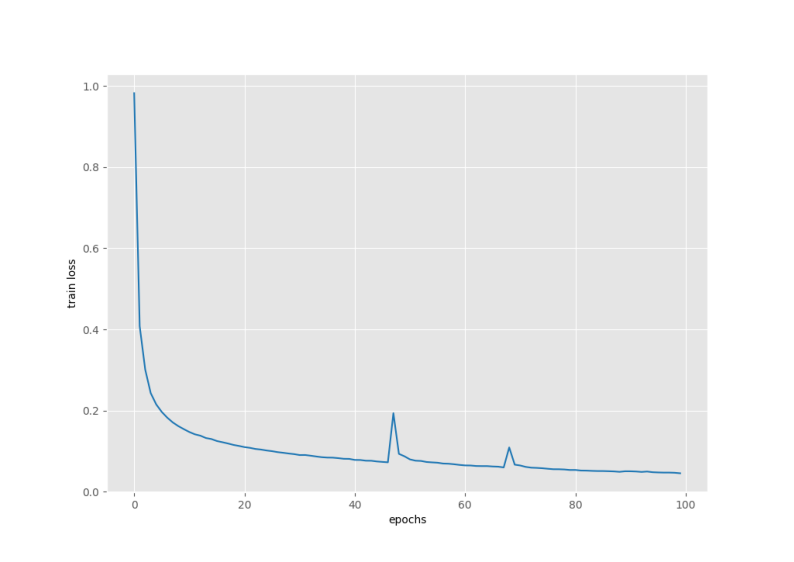

In [14]:
exp_results = Image.open('/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/outputs/training/AT2_FasterRCNN/train_loss_epoch.png') 
plt.figure(figsize=(10, 10))
plt.imshow(exp_results)
plt.axis('off')
plt.show()

In [ ]:
from the plot above it is clear that the training loss is improving as the number of epochs increase

## 7. Model Interference

In [74]:
%cd /root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/

/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN


In [75]:
!python inference.py --input data/test/ --weights outputs/training/AT2_FasterRCNN/best_model.pth

Building from model name arguments...
Test instances: 250
Image 1 done...
--------------------------------------------------
Image 2 done...
--------------------------------------------------
Image 3 done...
--------------------------------------------------
Image 4 done...
--------------------------------------------------
Image 5 done...
--------------------------------------------------
Image 6 done...
--------------------------------------------------
Image 7 done...
--------------------------------------------------
Image 8 done...
--------------------------------------------------
Image 9 done...
--------------------------------------------------
Image 10 done...
--------------------------------------------------
Image 11 done...
--------------------------------------------------
Image 12 done...
--------------------------------------------------
Image 13 done...
--------------------------------------------------
Image 14 done...
--------------------------------------------------

## 8. Visualization of Inference Results

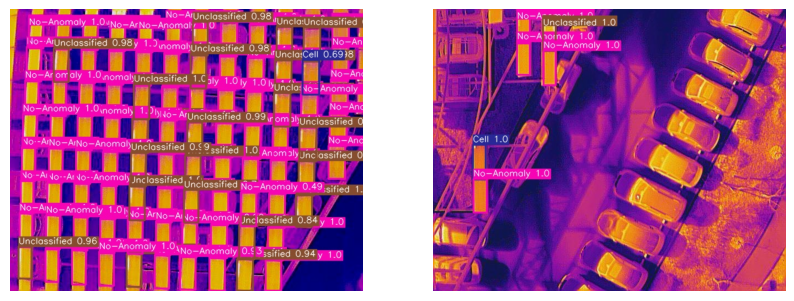

In [92]:
# Directory containing the images
image_dir = '/root/AT2/Object_detection/FasterRCNN/ObjectDetection-FasterRCNN/outputs/inference/res_1'

# list of all image filenames in the directory
image_files = [file for file in os.listdir(image_dir) if file.endswith('.jpg')]

# two random images
random_images = np.random.choice(image_files, size=2, replace=False)

# Plotting the two random images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

for i, image_name in enumerate(random_images):
    image_path = os.path.join(image_dir, image_name)
    image = plt.imread(image_path)
    axs[i].imshow(image) 
    axs[i].axis('off')

plt.show()
